# Results obtained with Ad revenue metric as reward

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from Utils_2 import *
from linUCB_1 import *
import seaborn as sns

In [2]:
dataExt3 = pd.read_csv('DataExtra/game3.csv')
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

dataExt2 = pd.read_csv('DataExtra/game1.csv')
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1

In [3]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big2 = dataExt2[Features_ALL].copy()
data_big3 = dataExt3[Features_ALL].copy()
print("\nDataExtra3 different A/B tests counts:")
print(data_big3.ab_test_id.value_counts())
print("\nDataExtra2 different A/B tests counts:")
print(data_big2.ab_test_id.value_counts())


DataExtra3 different A/B tests counts:
3350    1381702
3301     776402
3331     717633
3292     706119
3346     655856
3307     413295
Name: ab_test_id, dtype: int64

DataExtra2 different A/B tests counts:
3495    486295
3552    458911
3582    301515
3473    285731
3457    247844
3454    245962
3565    225935
3420    184148
3507    163803
3526    159849
Name: ab_test_id, dtype: int64


In [4]:
Test_ID_big = 3301
Test_ID_big2 = 3582
NGU = 1
DataDef = data_big3[(data_big3.ab_test_id == Test_ID_big) & (data_big3.NGU == NGU)]
DataDef2 = data_big2[(data_big2.ab_test_id == Test_ID_big2) & (data_big2.NGU == NGU)]
print("2 Arms data shape:", DataDef.shape)
print("4 Arms data shape:", DataDef2.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
DataDef_cat = CreateDummies(DataDef, Features_Dummie)
DataDef_cat2 = CreateDummies(DataDef2, Features_Dummie)

2 Arms data shape: (743103, 30)
4 Arms data shape: (289806, 30)


In [76]:
Actual_Dataset = DataDef_cat.sample(n=20000, random_state=35)
Actual_Dataset2 = DataDef_cat2.sample(n=50000, random_state=13)

## 2 Arms experiment

#### Day 1

In [8]:
Reward = "ad_revenue_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 8

Results1, Paths_Best1, Aligns_Best1, Mean_Reward_Best1, Mean_RewardArms_Best1, Mark_Best1, Feat_Best1, Times_ArmChosen1 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.02955546822116507
Parameters for following model:
	Reward: ad_revenue_d1
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 0.5


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:17<00:00, 1126.98it/s]


	Algorithm result is: 0.04247514768412459
	Score to beat is: 0.02955546822116507
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 1


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1060.29it/s]


	Algorithm result is: 0.04349700084287014
	Score to beat is: 0.02955546822116507
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 1.5


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1072.02it/s]


	Algorithm result is: 0.037915962766091486
	Score to beat is: 0.02955546822116507
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 2


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:19<00:00, 1043.50it/s]


	Algorithm result is: 0.03998771156232259
	Score to beat is: 0.02955546822116507
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 2.3581015157406195


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:18<00:00, 1105.58it/s]


	Algorithm result is: 0.04116807939456907
	Score to beat is: 0.02955546822116507
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 2.480207187300798


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:17<00:00, 1115.96it/s]


	Algorithm result is: 0.03650592788830813
	Score to beat is: 0.02955546822116507
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 3


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:17<00:00, 1114.05it/s]


	Algorithm result is: 0.03875031923073724
	Score to beat is: 0.02955546822116507
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 3.5


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:17<00:00, 1118.89it/s]

	Algorithm result is: 0.03762255646525259
	Score to beat is: 0.02955546822116507


In [9]:
Results1

[0.04247514768412459,
 0.04349700084287014,
 0.037915962766091486,
 0.03998771156232259,
 0.04116807939456907,
 0.03650592788830813,
 0.03875031923073724,
 0.03762255646525259]

In [10]:
print("Best alpha is:", Alphas[Results1.index(np.max(Results1))])
Alpha = Alphas[Results1.index(np.max(Results1))]

Best alpha is: 1


In [11]:
Mean_Reward_Best1

[0.04196449884116398,
 0.041199762154962516,
 0.04072244703764943,
 0.04256155178721393,
 0.042618068921590535,
 0.048389493962758816,
 0.042903767535831486,
 0.04761641650179046]

In [15]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))
print(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0].shape[0])
print(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1].shape[0])

0.008471984858595088
0.05087641640036898
10056
9944


In [14]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1))

Score to beat: 0.02955546822116507
Algorithm score: 0.04349700084287014


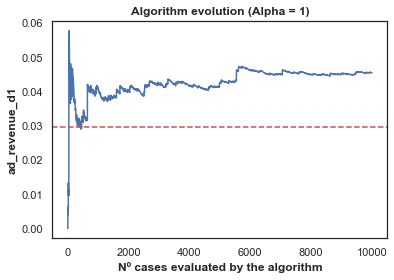

In [16]:
Plot_AlignRewards(Aligns_Best1, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

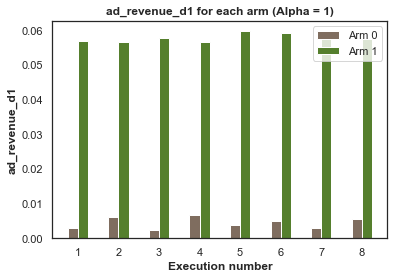

In [17]:
PerformanceArm2(Mean_RewardArms_Best1, Alpha, Reward)

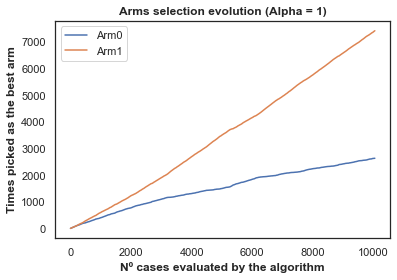

In [37]:
Plot_ArmsSelection(Paths_Best1, 1, Alpha)

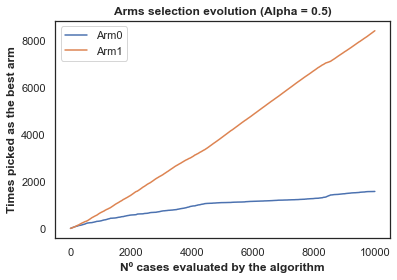

In [26]:
Plot_ArmsSelection(Paths_Best1, 4, Alpha)

Times each arm is chosen: [2467.875 7545.5  ]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 31.309697603171884
Proportion source_alias_source2 equals 0 for arm 1 is: 19.22895721195728


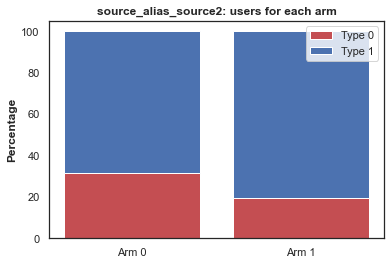

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 84.94636865010338
Proportion platform_alias_platform2 equals 0 for arm 1 is: 72.80829530031684


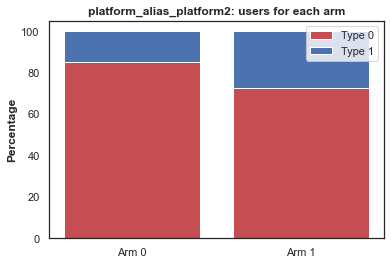

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.07085496 0.06934077 0.85980428]
Proportion country for arm 1 is: [0.3368397 0.1839747 0.4791856]


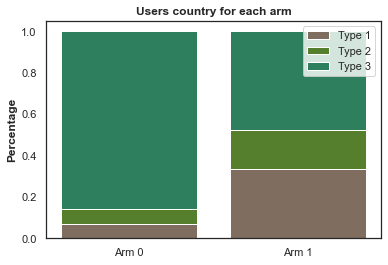

In [38]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best1, Feat_Best1)

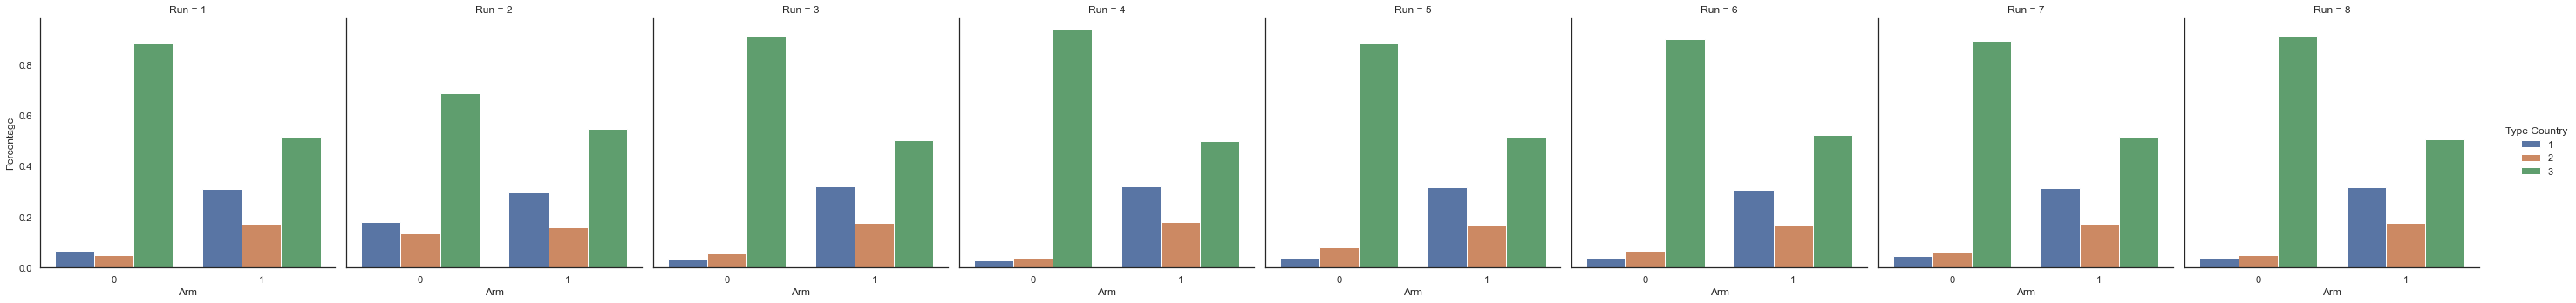

In [178]:
Country_8Runs(Feat_Best1)

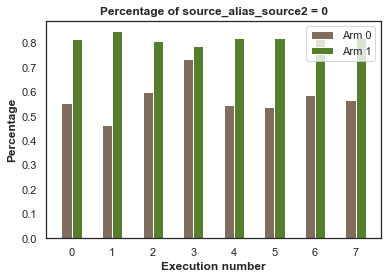

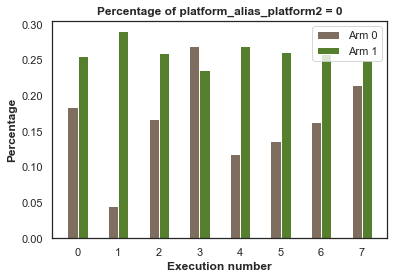

In [159]:
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "platform_alias_platform2")

#### Day 3

In [78]:
Reward = "ad_revenue_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results3, Paths_Best3, Aligns_Best3, Mean_Reward_Best3, Mean_RewardArms_Best3, Mark_Best3, Feat_Best3, Times_ArmChosen3 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.09106650320870059
Parameters for following model:
	Reward: ad_revenue_d3
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:02<00:00, 637.62it/s]


	Algorithm result is: 0.11744709506869574
	Score to beat is: 0.09106650320870059
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:01<00:00, 654.73it/s]


	Algorithm result is: 0.11790102747782741
	Score to beat is: 0.09106650320870059
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:05<00:00, 613.88it/s]


	Algorithm result is: 0.12205971605605533
	Score to beat is: 0.09106650320870059
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:01<00:00, 654.15it/s]


	Algorithm result is: 0.11457632523173764
	Score to beat is: 0.09106650320870059
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:03<00:00, 632.72it/s]


	Algorithm result is: 0.10773264547834778
	Score to beat is: 0.09106650320870059
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:02<00:00, 643.79it/s]


	Algorithm result is: 0.10907022684914305
	Score to beat is: 0.09106650320870059
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:13<00:00, 543.33it/s]


	Algorithm result is: 0.09430369528268956
	Score to beat is: 0.09106650320870059
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:02<00:00, 641.48it/s]

	Algorithm result is: 0.0836356435003382
	Score to beat is: 0.09106650320870059


In [79]:
Times_ArmChosen3

[[15377, 4797], [15168, 4910], [15652, 4105], [15096, 4645], [17754, 2169]]

In [80]:
Results3

[0.11744709506869574,
 0.11790102747782741,
 0.12205971605605533,
 0.11457632523173764,
 0.10773264547834778,
 0.10907022684914305,
 0.09430369528268956,
 0.0836356435003382]

In [81]:
print("Best alpha is:", Alphas[Results3.index(np.max(Results3))])
Alpha = Alphas[Results3.index(np.max(Results3))]

Best alpha is: 1.5


In [82]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

0.02514743420700071
0.15752168793801147


In [83]:
Actual_Dataset["ab_test_experience_id"].value_counts()

0    20081
1    19919
Name: ab_test_experience_id, dtype: int64

In [84]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3))

Score to beat: 0.09106650320870059
Algorithm score: 0.12205971605605533


In [85]:
Mean_Reward_Best3

[0.13982417765460523,
 0.12934379610731392,
 0.11008134296809235,
 0.11631739501251197,
 0.11473186853775312]

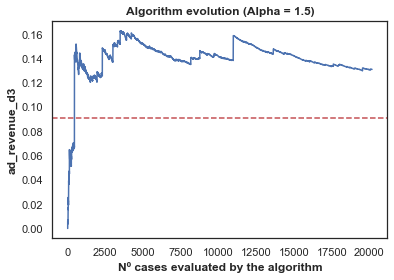

In [87]:
Plot_AlignRewards(Aligns_Best3, 0, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

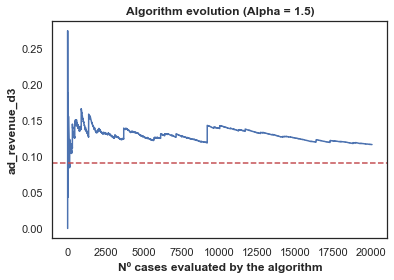

In [89]:
Plot_AlignRewards(Aligns_Best3, 1, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

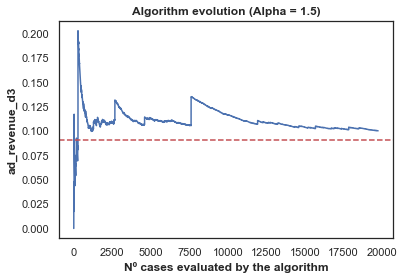

In [88]:
Plot_AlignRewards(Aligns_Best3, 2, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

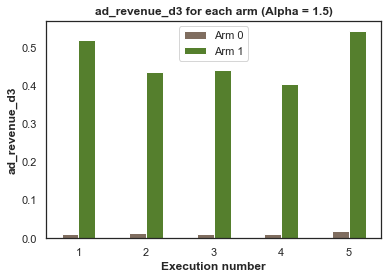

In [102]:
PerformanceArm2(Mean_RewardArms_Best3, Alpha, Reward)

In [93]:
Mean_RewardArms_Best3

[[0.01009784462279473, 0.5185007402659155],
 [0.013996720263949141, 0.43459777725512044],
 [0.01099479995703255, 0.43968513819772004],
 [0.010133872716124287, 0.4045973136564524],
 [0.018480886512773638, 0.5418726632378743]]

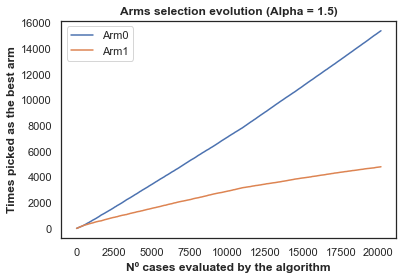

In [94]:
Plot_ArmsSelection(Paths_Best3, 0, Alpha)

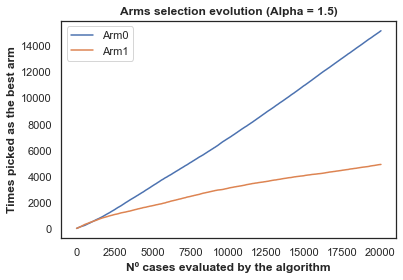

In [97]:
Plot_ArmsSelection(Paths_Best3, 1, Alpha)

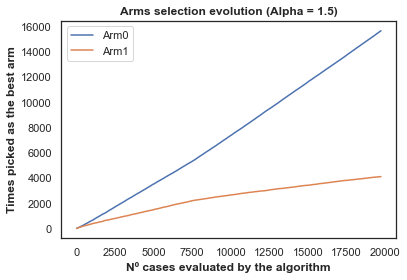

In [96]:
Plot_ArmsSelection(Paths_Best3, 2, Alpha)

Times each arm is chosen: [15809.4  4125.2]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 16.878154843508682
Proportion source_alias_source2 equals 0 for arm 1 is: 43.82925614587408


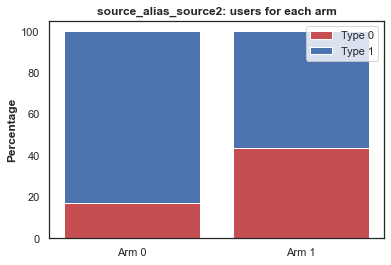

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 74.95055249624617
Proportion platform_alias_platform2 equals 0 for arm 1 is: 79.85877026988872


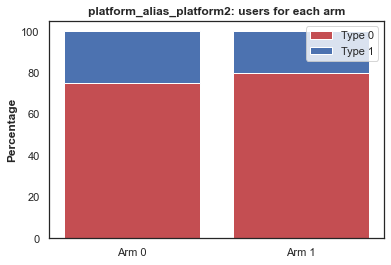

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.18964807 0.13345372 0.67689821]
Proportion country for arm 1 is: [0.59579414 0.20319787 0.20100799]


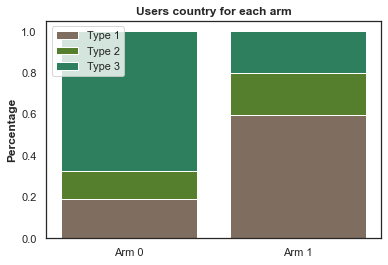

In [98]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3, Feat_Best3)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 81.03519286359008
Proportion country_alias_country_group1 equals 0 for arm 1 is: 40.42058628452202

Proportion country_alias_country_group2 equals 0 for arm 0 is: 86.65462849460278
Proportion country_alias_country_group2 equals 0 for arm 1 is: 79.68021298609264

Proportion country_alias_country_group3 equals 0 for arm 0 is: 32.31017864180714
Proportion country_alias_country_group3 equals 0 for arm 1 is: 79.89920072938531

Proportion platform_alias_platform2 equals 0 for arm 0 is: 74.95055249624617
Proportion platform_alias_platform2 equals 0 for arm 1 is: 79.85877026988872

Proportion source_alias_source2 equals 0 for arm 0 is: 16.878154843508682
Proportion source_alias_source2 equals 0 for arm 1 is: 43.82925614587408

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 59.20726173629718
Proportion return_d1 equals 0 for arm 1 is: 42.6418018331

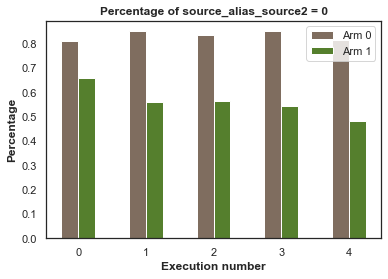

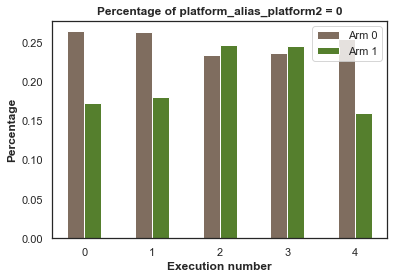

In [100]:
printFeatures2(Mark_Best3, Feat_Best3, Features)
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "platform_alias_platform2")

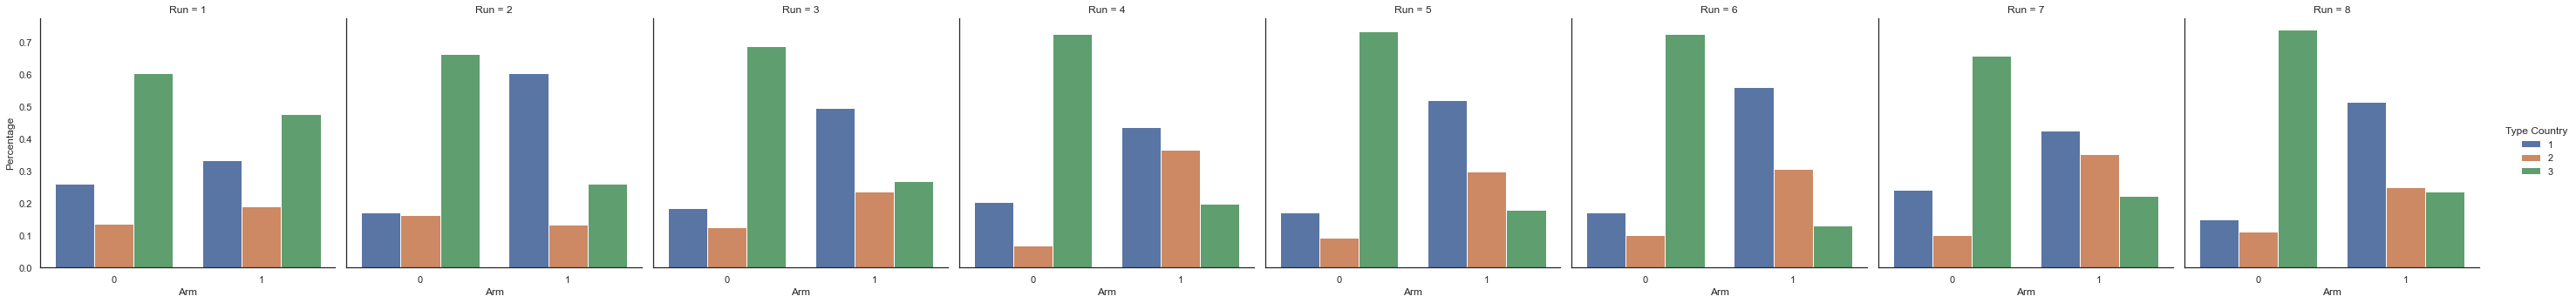

In [179]:
Country_8Runs(Feat_Best3)

#### Day 7

In [46]:
Reward = "ad_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7, Paths_Best7, Aligns_Best7, Mean_Reward_Best7, Mean_RewardArms_Best7, Mark_Best7, Feat_Best7, Times_ArmChosen7 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.16527106567572986
Parameters for following model:
	Reward: ad_revenue_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 633.21it/s]


	Algorithm result is: 0.18789911229674947
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:30<00:00, 651.87it/s]


	Algorithm result is: 0.14452998188473445
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 636.35it/s]


	Algorithm result is: 0.11176807199312042
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 629.22it/s]


	Algorithm result is: 0.09398389645186637
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 631.76it/s]


	Algorithm result is: 0.09305297536992028
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:31<00:00, 631.32it/s]


	Algorithm result is: 0.09659696174730334
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:32<00:00, 614.60it/s]


	Algorithm result is: 0.08297841865605972
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:32<00:00, 615.99it/s]

	Algorithm result is: 0.10523992258704798
	Score to beat is: 0.16527106567572986


In [48]:
Results7

[0.18789911229674947,
 0.14452998188473445,
 0.11176807199312042,
 0.09398389645186637,
 0.09305297536992028,
 0.09659696174730334,
 0.08297841865605972,
 0.10523992258704798]

In [49]:
print("Best alpha is:", Alphas[Results7.index(np.max(Results7))])
Alpha = Alphas[Results7.index(np.max(Results7))]

Best alpha is: 0.5


In [50]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

0.05849035224991158
0.27325445809427623


In [51]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7))

Score to beat: 0.16527106567572986
Algorithm score: 0.18789911229674947


In [52]:
Mean_Reward_Best7

[0.1671417944263612,
 0.2358510016180377,
 0.21121631762910112,
 0.11944813328021536,
 0.20583831453003185]

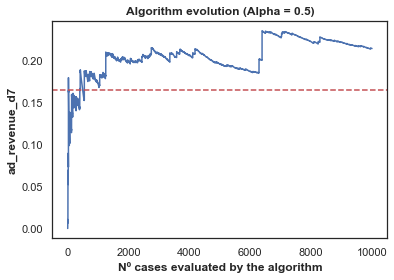

In [61]:
Plot_AlignRewards(Aligns_Best7, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

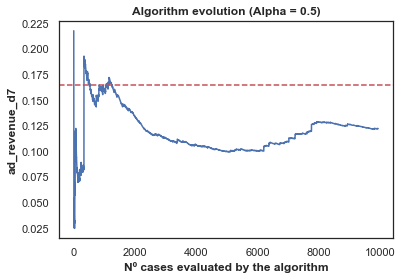

In [62]:
Plot_AlignRewards(Aligns_Best7, 3, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

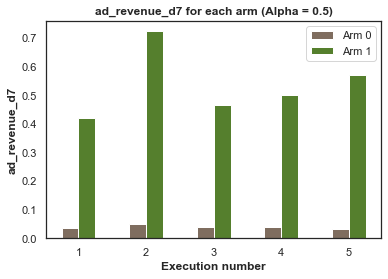

In [64]:
PerformanceArm2(Mean_RewardArms_Best7, Alpha, Reward)

In [69]:
Times_ArmChosen7

[[7552, 2465], [8449, 1839], [7819, 2021], [8137, 1796], [6698, 3397]]

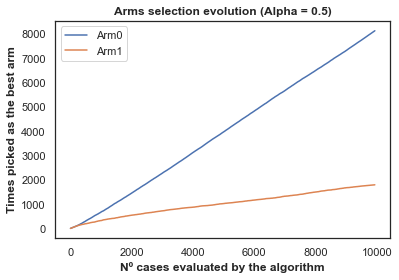

In [66]:
Plot_ArmsSelection(Paths_Best7, 3, Alpha)

In [101]:
Plot_ArmsSelection(Paths_Best7, 0, Alpha)

NameError: name 'Paths_Best7' is not defined

Times each arm is chosen: [7731.  2303.6]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 20.16957822843619
Proportion source_alias_source2 equals 0 for arm 1 is: 31.218912158844965


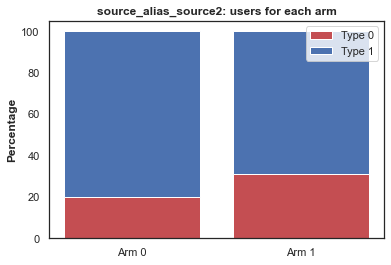

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.96406101310136
Proportion platform_alias_platform2 equals 0 for arm 1 is: 76.05617080318046


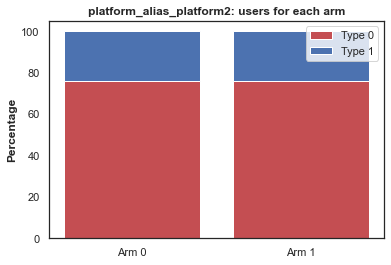

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.23494343 0.08471733 0.68033924]
Proportion country for arm 1 is: [0.40745636 0.38245095 0.21009269]


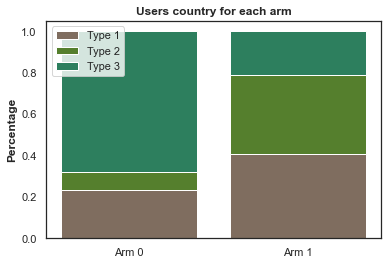

In [75]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7, Feat_Best7)

In [161]:
printFeatures2(Mark_Best7, Feat_Best7, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 76.5056571178065
Proportion country_alias_country_group1 equals 0 for arm 1 is: 59.254364445541455

Proportion country_alias_country_group2 equals 0 for arm 0 is: 91.52826715524596
Proportion country_alias_country_group2 equals 0 for arm 1 is: 61.754905044953226

Proportion country_alias_country_group3 equals 0 for arm 0 is: 31.96607572694753
Proportion country_alias_country_group3 equals 0 for arm 1 is: 78.99073050950534

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.96406101310136
Proportion platform_alias_platform2 equals 0 for arm 1 is: 76.05617080318046

Proportion source_alias_source2 equals 0 for arm 0 is: 20.16957822843619
Proportion source_alias_source2 equals 0 for arm 1 is: 31.218912158844965

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 59.67240717305196
Proportion return_d1 equals 0 for arm 1 is: 42.142570347

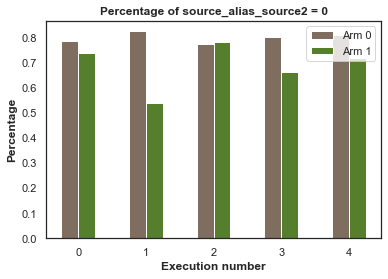

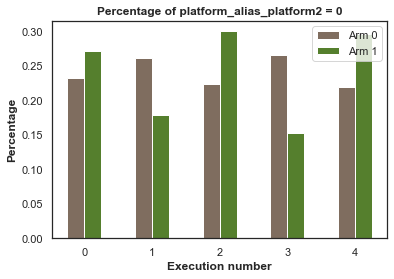

In [162]:
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "platform_alias_platform2")

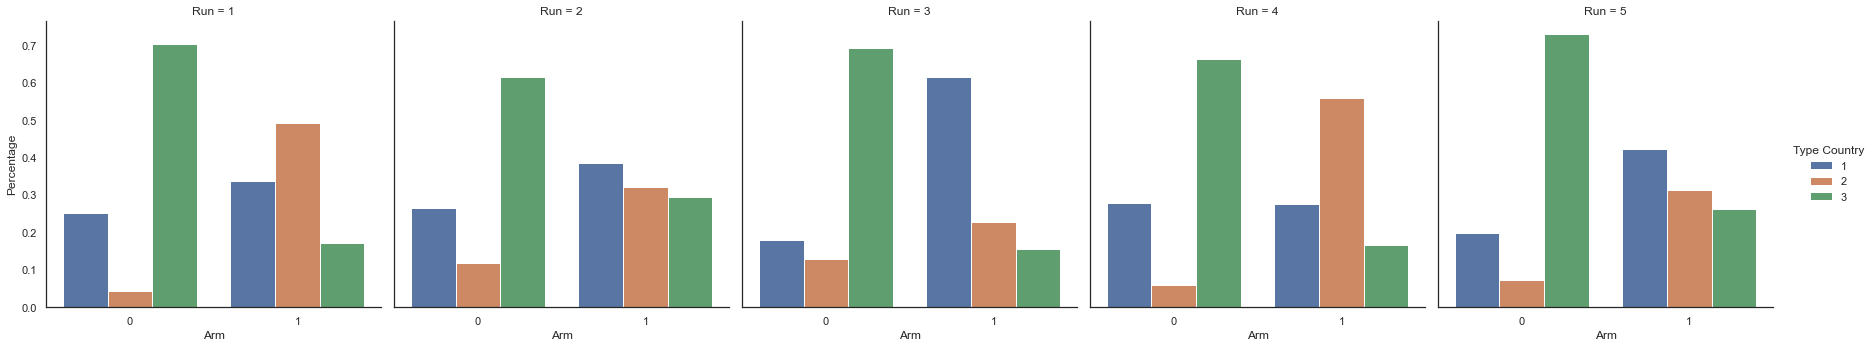

In [180]:
Country_5Runs(Feat_Best7)

#### Removing features

In [9]:
Reward = "ad_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_aux1, Paths_Best7_aux1, Aligns_Best7_aux1, Mean_Reward_Best7_aux1, Mean_RewardArms_Best7_aux1, Mark_Best7_aux1, Feat_Best7_aux1, Times_ArmChosen7_aux1 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.16527106567572986
Parameters for following model:
	Reward: ad_revenue_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 897.25it/s]


	Algorithm result is: 0.21874119283036103
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 904.03it/s]


	Algorithm result is: 0.229380282011801
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 893.86it/s]


	Algorithm result is: 0.21976434405100767
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 902.04it/s]


	Algorithm result is: 0.19071084732608284
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 894.27it/s]


	Algorithm result is: 0.20824938125343456
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 897.93it/s]


	Algorithm result is: 0.20627740587789184
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:21<00:00, 909.44it/s]


	Algorithm result is: 0.17710296369446726
	Score to beat is: 0.16527106567572986
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:22<00:00, 896.00it/s]

	Algorithm result is: 0.17816254809918058
	Score to beat is: 0.16527106567572986


In [48]:
Results7_aux1

[0.18789911229674947,
 0.14452998188473445,
 0.11176807199312042,
 0.09398389645186637,
 0.09305297536992028,
 0.09659696174730334,
 0.08297841865605972,
 0.10523992258704798]

In [49]:
print("Best alpha is:", Alphas[Results7_aux1.index(np.max(Results7_aux1))])
Alpha = Alphas[Results7_aux1.index(np.max(Results7_aux1))]

Best alpha is: 0.5


In [50]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

0.05849035224991158
0.27325445809427623


In [51]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_aux1))

Score to beat: 0.16527106567572986
Algorithm score: 0.18789911229674947


In [52]:
Mean_Reward_Best7_aux1

[0.1671417944263612,
 0.2358510016180377,
 0.21121631762910112,
 0.11944813328021536,
 0.20583831453003185]

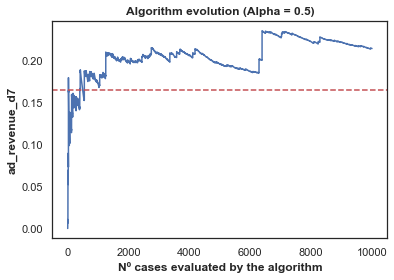

In [61]:
Plot_AlignRewards(Aligns_Best7_aux1, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

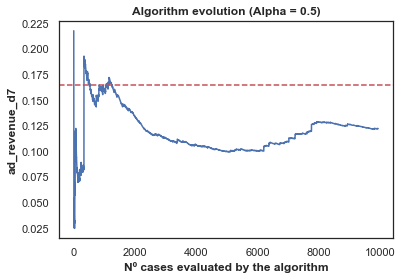

In [62]:
Plot_AlignRewards(Aligns_Best7_aux1, 3, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

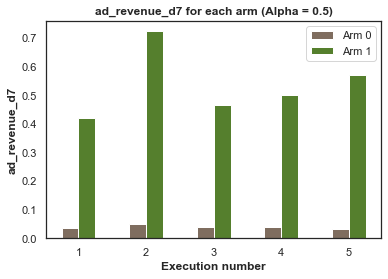

In [64]:
PerformanceArm2(Mean_RewardArms_Best7_aux1, Alpha, Reward)

In [69]:
Times_ArmChosen7_aux1

[[7552, 2465], [8449, 1839], [7819, 2021], [8137, 1796], [6698, 3397]]

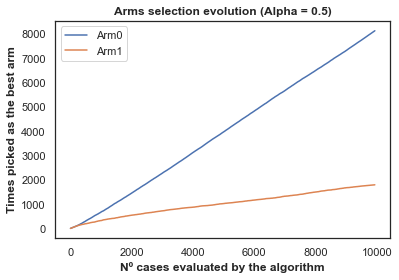

In [66]:
Plot_ArmsSelection(Paths_Best7_aux1, 3, Alpha)

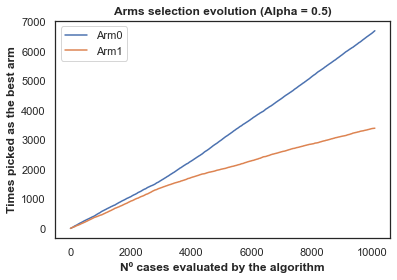

In [74]:
Plot_ArmsSelection(Paths_Best7_aux1, 4, Alpha)

Times each arm is chosen: [7731.  2303.6]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 20.16957822843619
Proportion source_alias_source2 equals 0 for arm 1 is: 31.218912158844965


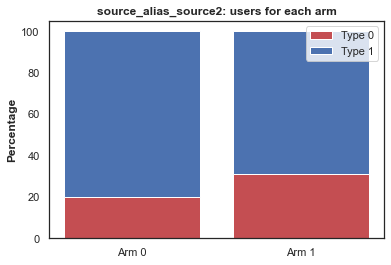

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.96406101310136
Proportion platform_alias_platform2 equals 0 for arm 1 is: 76.05617080318046


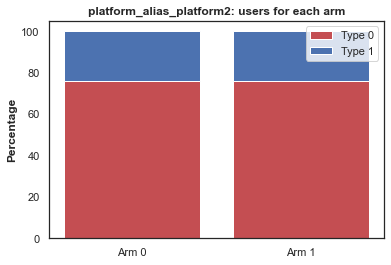

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.23494343 0.08471733 0.68033924]
Proportion country for arm 1 is: [0.40745636 0.38245095 0.21009269]


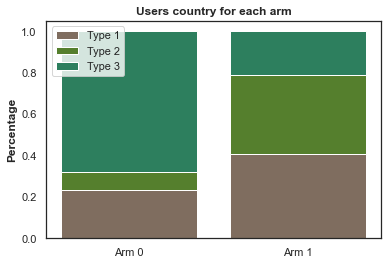

In [75]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_aux1, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_aux1, Feat_Best7_aux1)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_aux1, Feat_Best7_aux1)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_aux1, Feat_Best7_aux1)

In [161]:
printFeatures2(Mark_Best7_aux1, Feat_Best7_aux1, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 76.5056571178065
Proportion country_alias_country_group1 equals 0 for arm 1 is: 59.254364445541455

Proportion country_alias_country_group2 equals 0 for arm 0 is: 91.52826715524596
Proportion country_alias_country_group2 equals 0 for arm 1 is: 61.754905044953226

Proportion country_alias_country_group3 equals 0 for arm 0 is: 31.96607572694753
Proportion country_alias_country_group3 equals 0 for arm 1 is: 78.99073050950534

Proportion platform_alias_platform2 equals 0 for arm 0 is: 75.96406101310136
Proportion platform_alias_platform2 equals 0 for arm 1 is: 76.05617080318046

Proportion source_alias_source2 equals 0 for arm 0 is: 20.16957822843619
Proportion source_alias_source2 equals 0 for arm 1 is: 31.218912158844965

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 59.67240717305196
Proportion return_d1 equals 0 for arm 1 is: 42.142570347

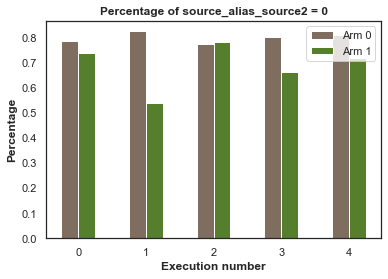

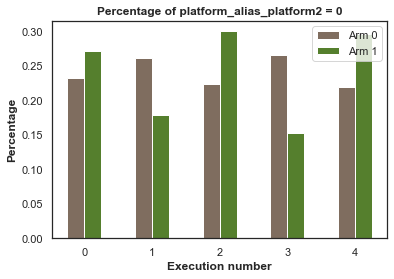

In [162]:
PlotFeaturesArm_2(Feat_Best7_aux1, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7_aux1, Alpha, Reward = "platform_alias_platform2")

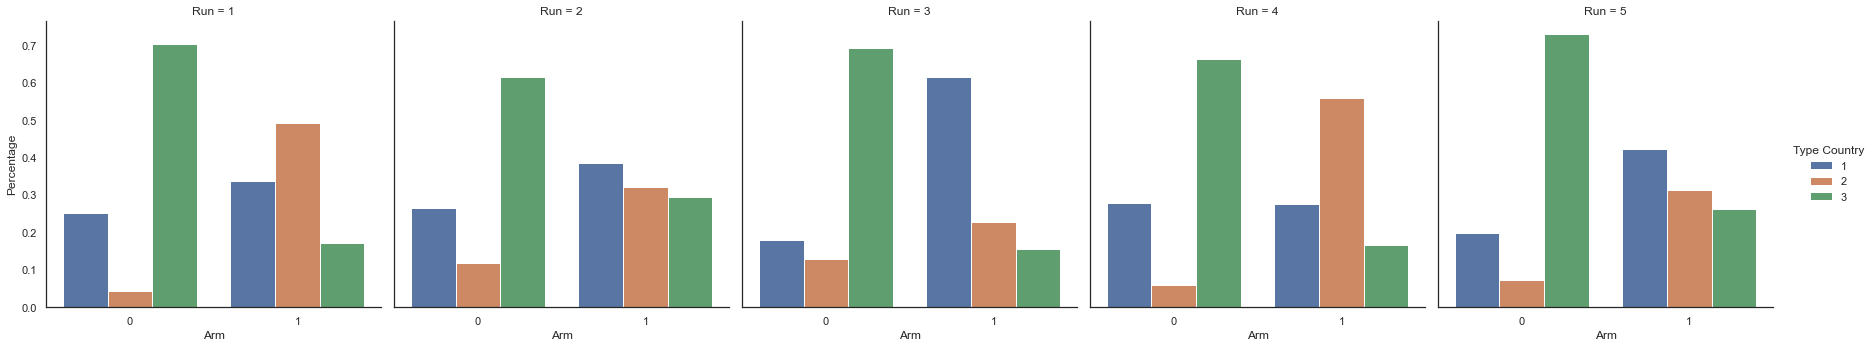

In [180]:
Country_5Runs(Feat_Best7_aux1)

### 4 Arms experiments

#### Day 1

In [76]:
Reward = "ad_revenue_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results1_4, Paths_Best1_4, Aligns_Best1_4, Mean_Reward_Best1_4, Mean_RewardArms_Best1_4, Mark_Best1_4, Feat_Best1_4, Times_ArmChosen1_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.35035260396506523
Parameters for following model:
	Reward: ad_revenue_d1
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 0.5


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:45<00:00, 1094.27it/s]


	Algorithm result is: 0.34630180187985454
	Score to beat is: 0.35035260396506523
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 1


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:43<00:00, 1149.22it/s]


	Algorithm result is: 0.3386598202059354
	Score to beat is: 0.35035260396506523
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 1.5


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:43<00:00, 1144.98it/s]


	Algorithm result is: 0.35542169157418524
	Score to beat is: 0.35035260396506523
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 2


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:44<00:00, 1113.72it/s]


	Algorithm result is: 0.34374643505079383
	Score to beat is: 0.35035260396506523
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 2.3581015157406195


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:42<00:00, 1163.04it/s]


	Algorithm result is: 0.35136712374876333
	Score to beat is: 0.35035260396506523
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 2.480207187300798


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:44<00:00, 1118.72it/s]


	Algorithm result is: 0.3508042741030956
	Score to beat is: 0.35035260396506523
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 3


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:43<00:00, 1146.60it/s]


	Algorithm result is: 0.34313460575172955
	Score to beat is: 0.35035260396506523
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d1 RUNNING
Alpha equals: 3.5


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:45<00:00, 1090.71it/s]

	Algorithm result is: 0.3398770580932053
	Score to beat is: 0.35035260396506523


In [77]:
Results1_4

[0.34630180187985454,
 0.3386598202059354,
 0.35542169157418524,
 0.34374643505079383,
 0.35136712374876333,
 0.3508042741030956,
 0.34313460575172955,
 0.3398770580932053]

In [79]:
print("Best alpha is:", Alphas[Results1_4.index(np.max(Results1_4))])
Alpha = Alphas[Results1_4.index(np.max(Results1_4))]

Best alpha is: 1.5


In [80]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.34422100544609197
0.35069123950663555


In [82]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1_4))

Score to beat: 0.35035260396506523
Algorithm score: 0.35542169157418524


In [83]:
Mean_Reward_Best1_4

[0.3469473726806364,
 0.37431249293665886,
 0.3387113976064912,
 0.34662905990112974,
 0.37050813474600996]

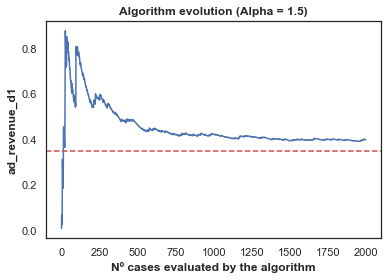

In [88]:
Plot_AlignRewards(Aligns_Best1_4, 1, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

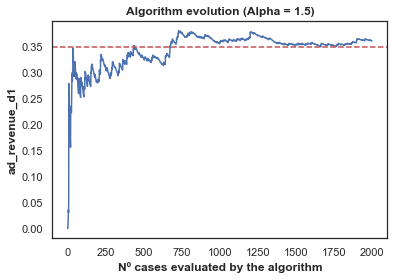

In [87]:
Plot_AlignRewards(Aligns_Best1_4, 4, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

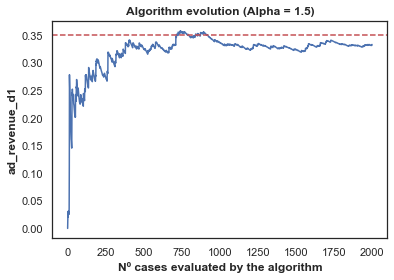

In [85]:
Plot_AlignRewards(Aligns_Best1_4, 2, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

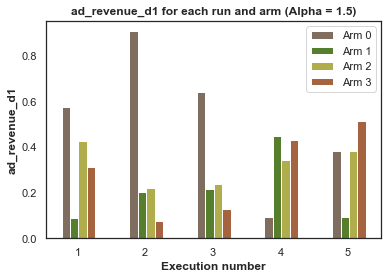

In [95]:
PerformanceArm4(Mean_RewardArms_Best1_4, Alpha, Reward)

In [96]:
Times_ArmChosen1_4

[[2667, 3467, 2832, 3670],
 [3161, 2365, 3429, 3641],
 [4147, 2713, 2246, 3392],
 [2083, 2538, 3593, 4332],
 [1826, 3104, 2967, 4560]]

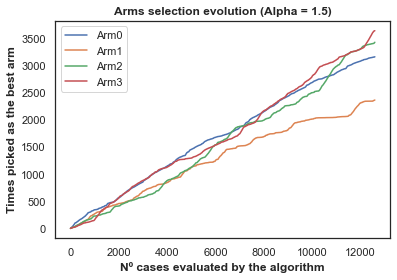

In [93]:
Plot_ArmsSelection(Paths_Best1_4, 1, Alpha)

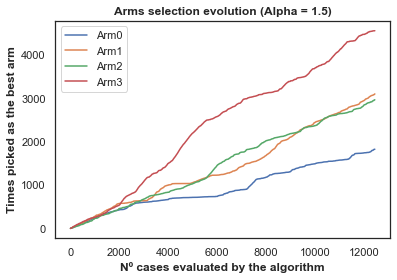

In [92]:
Plot_ArmsSelection(Paths_Best1_4, 4, Alpha)

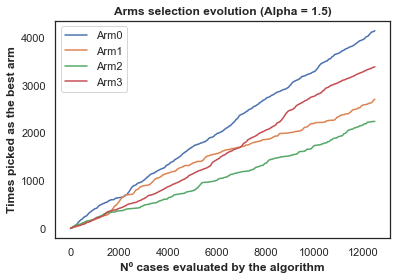

In [94]:
Plot_ArmsSelection(Paths_Best1_4, 2, Alpha)

In [12]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [2776.8 2837.4 3013.4 3919. ]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 84.53143366895533
Proportion source_alias_source2 equals 0 for arm 1 is: 71.53640551453347
Proportion source_alias_source2 equals 0 for arm 2 is: 87.56994259006532
Proportion source_alias_source2 equals 0 for arm 3 is: 60.45944163262552


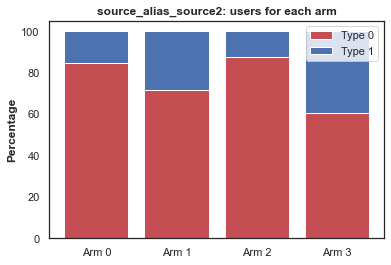

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 80.56313165448657
Proportion platform_alias_platform2 equals 0 for arm 1 is: 85.07202314868216
Proportion platform_alias_platform2 equals 0 for arm 2 is: 76.73252688880375
Proportion platform_alias_platform2 equals 0 for arm 3 is: 82.71348828853743


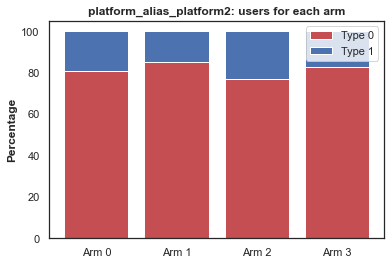

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.24439588 0.17923095 0.57637316]
Proportion country for arm 1 is: [0.02120242 0.13562645 0.84317113]
Proportion country for arm 2 is: [0.07250358 0.12716051 0.80033592]
Proportion country for arm 3 is: [0.09574839 0.06209583 0.84215578]


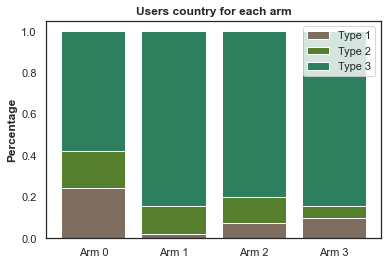

In [97]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1_4, Feat_Best1_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1_4, Feat_Best1_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best1_4, Feat_Best1_4)

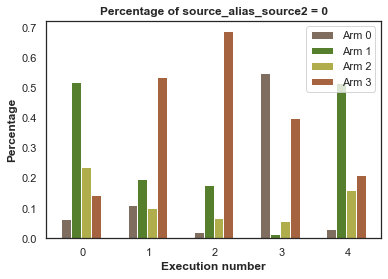

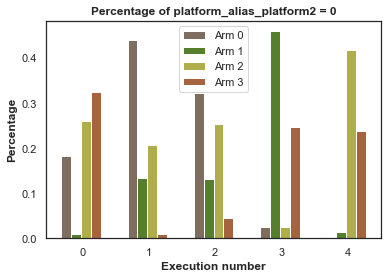

In [152]:
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "platform_alias_platform2")

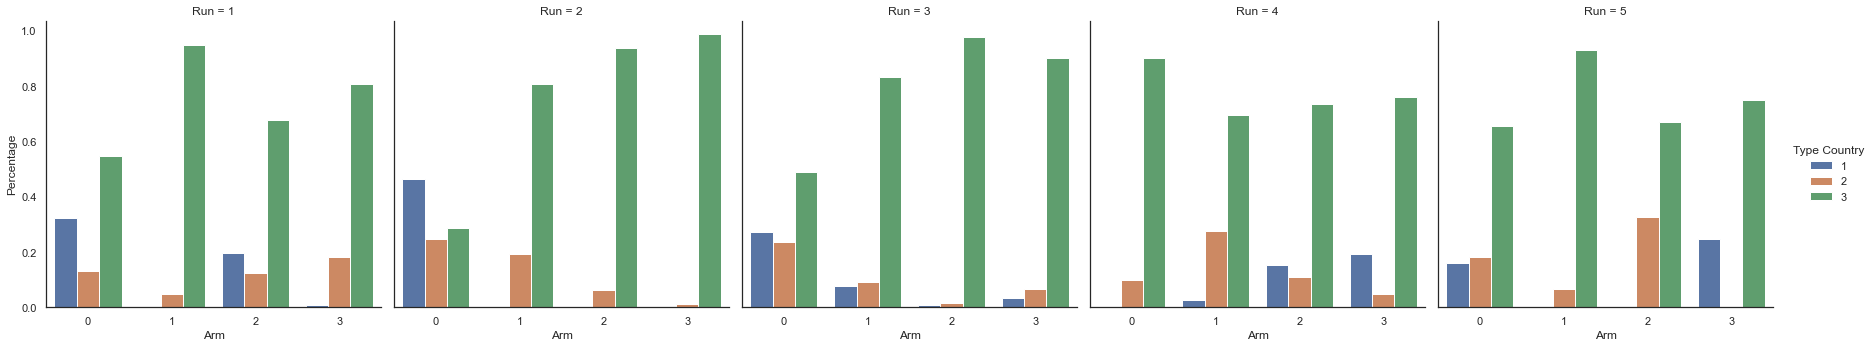

In [202]:
PlotFeaturesArm_4_Country5Runs(Feat_Best1_4)

#### Day 3

In [104]:
Reward = "ad_revenue_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results3_4, Paths_Best3_4, Aligns_Best3_4, Mean_Reward_Best3_4, Mean_RewardArms_Best3_4, Mark_Best3_4, Feat_Best3_4, Times_ArmChosen3_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.4387729572705468
Parameters for following model:
	Reward: ad_revenue_d3
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:15<00:00, 660.10it/s]


	Algorithm result is: 0.4478332963247144
	Score to beat is: 0.4387729572705468
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:24<00:00, 594.13it/s]


	Algorithm result is: 0.4349090077802207
	Score to beat is: 0.4387729572705468
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:18<00:00, 633.66it/s]


	Algorithm result is: 0.4415289087736921
	Score to beat is: 0.4387729572705468
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:20<00:00, 620.63it/s]


	Algorithm result is: 0.43431927503926115
	Score to beat is: 0.4387729572705468
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:21<00:00, 613.63it/s]


	Algorithm result is: 0.4268509088319431
	Score to beat is: 0.4387729572705468
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:22<00:00, 604.98it/s]


	Algorithm result is: 0.45032058440177636
	Score to beat is: 0.4387729572705468
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:21<00:00, 610.67it/s]


	Algorithm result is: 0.43671666786302393
	Score to beat is: 0.4387729572705468
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d3 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:19<00:00, 628.30it/s]

	Algorithm result is: 0.43776365796615196
	Score to beat is: 0.4387729572705468


In [105]:
Results3_4

[0.4478332963247144,
 0.4349090077802207,
 0.4415289087736921,
 0.43431927503926115,
 0.4268509088319431,
 0.45032058440177636,
 0.43671666786302393,
 0.43776365796615196]

In [106]:
print("Best alpha is:", Alphas[Results3_4.index(np.max(Results3_4))])
Alpha = Alphas[Results3_4.index(np.max(Results3_4))]

Best alpha is: 2.480207187300798


In [108]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.43074477600342914
0.4375016820046507


In [110]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3_4))

Score to beat: 0.4387729572705468
Algorithm score: 0.45032058440177636


In [111]:
Mean_Reward_Best3_4

[0.4591527600999312,
 0.4494172004727482,
 0.445586518813043,
 0.42055840168289943,
 0.47688804094026]

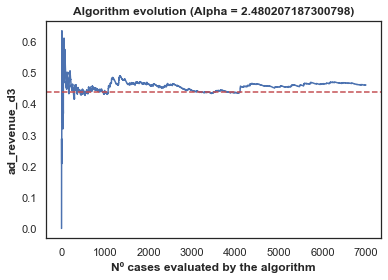

In [116]:
Plot_AlignRewards(Aligns_Best3_4, 0, Reward, Alpha, N = 7000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

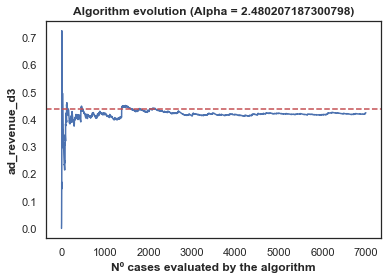

In [117]:
Plot_AlignRewards(Aligns_Best3_4, 3, Reward, Alpha, N = 7000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

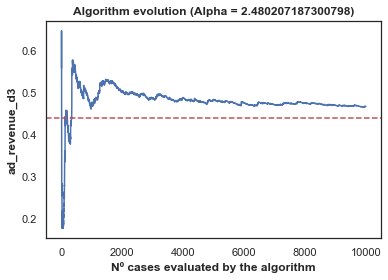

In [119]:
Plot_AlignRewards(Aligns_Best3_4, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

In [125]:
Times_ArmChosen3_4

[[4247, 2112, 3925, 2382],
 [2636, 3223, 4822, 1992],
 [2854, 2778, 2752, 3989],
 [3893, 2210, 3011, 3385],
 [2544, 3936, 4633, 1235]]

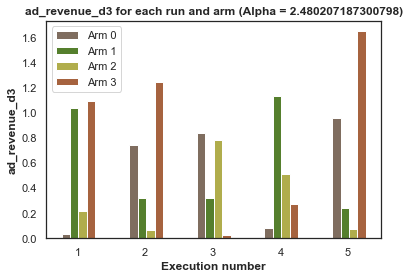

In [126]:
PerformanceArm4(Mean_RewardArms_Best3_4, Alpha, Reward)

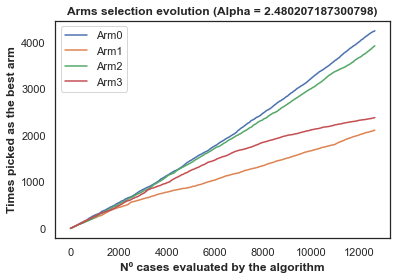

In [122]:
Plot_ArmsSelection(Paths_Best3_4, 0, Alpha)

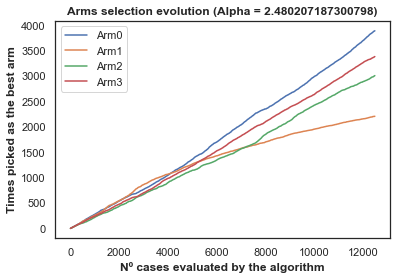

In [123]:
Plot_ArmsSelection(Paths_Best3_4, 3, Alpha)

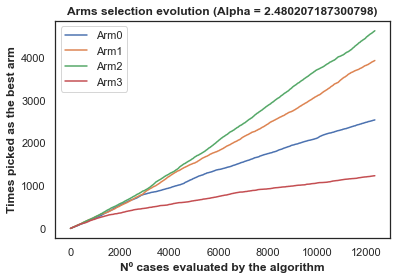

In [124]:
Plot_ArmsSelection(Paths_Best3_4, 4, Alpha)

In [11]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [3234.8 2851.8 3828.6 2596.6]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 79.08367797786048
Proportion source_alias_source2 equals 0 for arm 1 is: 71.57472616322137
Proportion source_alias_source2 equals 0 for arm 2 is: 78.04196011942432
Proportion source_alias_source2 equals 0 for arm 3 is: 67.33876733893041


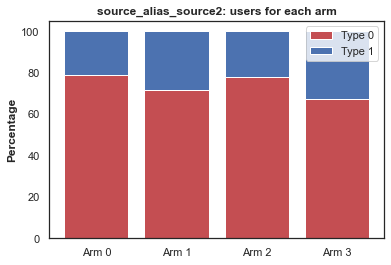

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 71.32653699466222
Proportion platform_alias_platform2 equals 0 for arm 1 is: 79.19835070159662
Proportion platform_alias_platform2 equals 0 for arm 2 is: 80.73871300904203
Proportion platform_alias_platform2 equals 0 for arm 3 is: 86.98054640580554


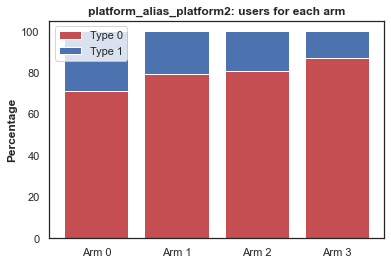

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.17376884 0.14681572 0.67941544]
Proportion country for arm 1 is: [0.16765866 0.11219159 0.72014976]
Proportion country for arm 2 is: [0.09415558 0.1325812  0.77326322]
Proportion country for arm 3 is: [0.11053444 0.10035599 0.78910958]


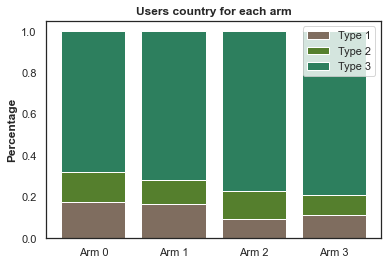

In [127]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3_4, Feat_Best3_4)

In [128]:
printFeatures2(Mark_Best3_4, Feat_Best3_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 82.62311599038806
Proportion country_alias_country_group1 equals 0 for arm 1 is: 83.23413449940259
Proportion country_alias_country_group1 equals 0 for arm 2 is: 90.5844424095327
Proportion country_alias_country_group1 equals 0 for arm 3 is: 88.94655633194051

Proportion country_alias_country_group2 equals 0 for arm 0 is: 85.31842835357742
Proportion country_alias_country_group2 equals 0 for arm 1 is: 88.78084136129252
Proportion country_alias_country_group2 equals 0 for arm 2 is: 86.74187968764485
Proportion country_alias_country_group2 equals 0 for arm 3 is: 89.96440125565695

Proportion country_alias_country_group3 equals 0 for arm 0 is: 32.058455656034525
Proportion country_alias_country_group3 equals 0 for arm 1 is: 27.985024139304894
Proportion country_alias_country_group3 equals 0 for arm 2 is: 22.673677902822455
Proportion country_alias_country_group3 equals 0 for arm 3 is: 21.089042412402556

Proportion platform_al

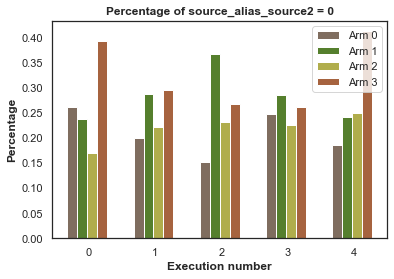

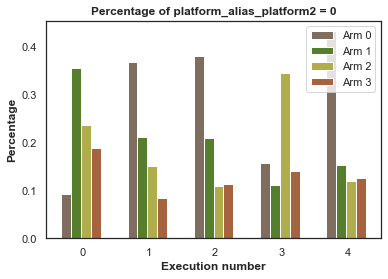

In [151]:
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "platform_alias_platform2")

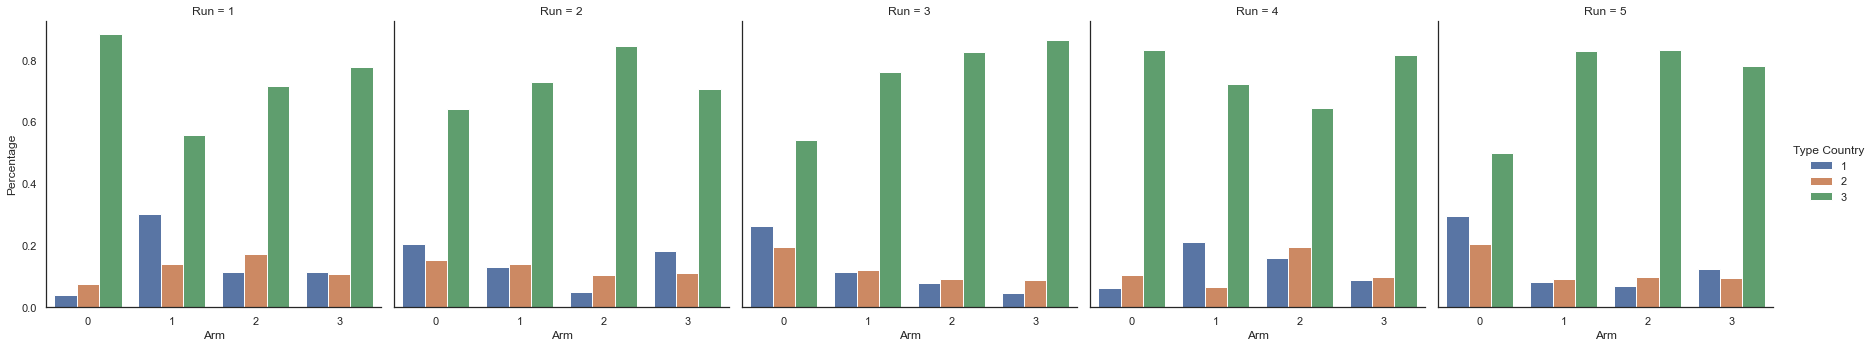

In [203]:
PlotFeaturesArm_4_Country5Runs(Feat_Best3_4)

#### Day 7

In [129]:
Reward = "ad_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_4, Paths_Best7_4, Aligns_Best7_4, Mean_Reward_Best7_4, Mean_RewardArms_Best7_4, Mark_Best7_4, Feat_Best7_4, Times_ArmChosen7_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.5414905227138754
Parameters for following model:
	Reward: ad_revenue_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:06<00:00, 394.58it/s]


	Algorithm result is: 0.5529915163230024
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:03<00:00, 405.86it/s]


	Algorithm result is: 0.5338020359154771
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:03<00:00, 406.33it/s]


	Algorithm result is: 0.5342158590371742
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:03<00:00, 406.04it/s]


	Algorithm result is: 0.5412527716416845
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:02<00:00, 409.17it/s]


	Algorithm result is: 0.5577572734629144
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:00<00:00, 415.99it/s]


	Algorithm result is: 0.5374483070804323
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:59<00:00, 420.03it/s]


	Algorithm result is: 0.5510381477830335
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:59<00:00, 418.58it/s]


	Algorithm result is: 0.5575688300219208
	Score to beat is: 0.5414905227138754


In [130]:
Results7_4

[0.5529915163230024,
 0.5338020359154771,
 0.5342158590371742,
 0.5412527716416845,
 0.5577572734629144,
 0.5374483070804323,
 0.5510381477830335,
 0.5575688300219208]

In [131]:
print("Best alpha is:", Alphas[Results7_4.index(np.max(Results7_4))])
Alpha = Alphas[Results7_4.index(np.max(Results7_4))]

Best alpha is: 2.3581015157406195


In [132]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.5254883941191079
0.5384326550589074


In [135]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4))

Score to beat: 0.5414905227138754
Algorithm score: 0.5577572734629144


In [136]:
Mean_Reward_Best7_4

[0.5713794990691988,
 0.5576763836771599,
 0.5599084755663342,
 0.575615507501287,
 0.5242065015005916]

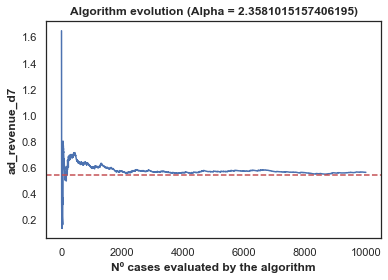

In [142]:
Plot_AlignRewards(Aligns_Best7_4, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

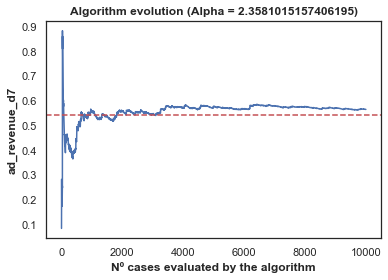

In [147]:
Plot_AlignRewards(Aligns_Best7_4, 2, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

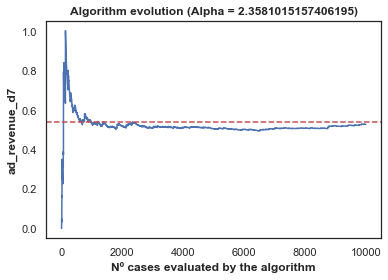

In [139]:
Plot_AlignRewards(Aligns_Best7_4, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

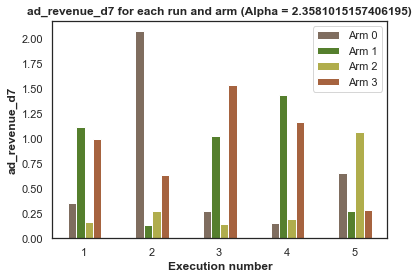

In [143]:
PerformanceArm4(Mean_RewardArms_Best7_4, Alpha, Reward)

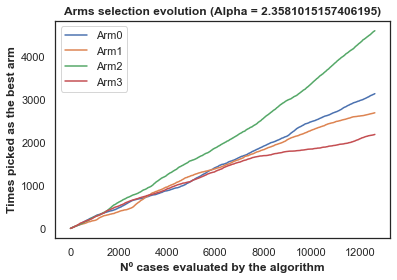

In [144]:
Plot_ArmsSelection(Paths_Best7_4, 0, Alpha)

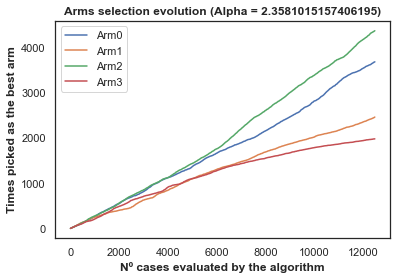

In [146]:
Plot_ArmsSelection(Paths_Best7_4, 2, Alpha)

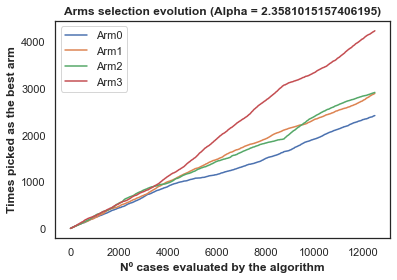

In [145]:
Plot_ArmsSelection(Paths_Best7_4, 4, Alpha)

In [10]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [4313. 5767.]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 32.3051948051948
Proportion source_alias_source2 equals 0 for arm 1 is: 13.614290669441553


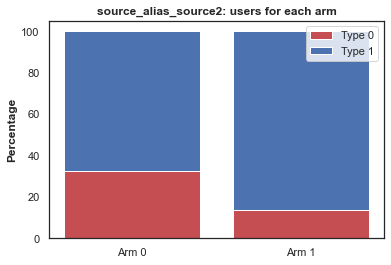

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 61.827458256029686
Proportion platform_alias_platform2 equals 0 for arm 1 is: 84.25251474158863


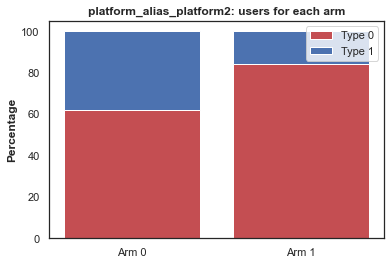

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.57884972 0.26089981 0.16025046]
Proportion country for arm 1 is: [0.06347555 0.07336108 0.86316337]


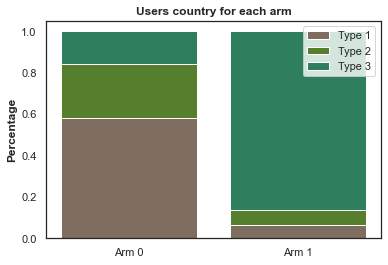

In [189]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4, Feat_Best7_4)

In [148]:
printFeatures2(Mark_Best7_4, Feat_Best7_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 89.66757738393409
Proportion country_alias_country_group1 equals 0 for arm 1 is: 82.51952013376267
Proportion country_alias_country_group1 equals 0 for arm 2 is: 88.21222602622025
Proportion country_alias_country_group1 equals 0 for arm 3 is: 87.47784208912768

Proportion country_alias_country_group2 equals 0 for arm 0 is: 84.31243844995768
Proportion country_alias_country_group2 equals 0 for arm 1 is: 86.40520137049774
Proportion country_alias_country_group2 equals 0 for arm 2 is: 92.33214906928336
Proportion country_alias_country_group2 equals 0 for arm 3 is: 83.95994206429667

Proportion country_alias_country_group3 equals 0 for arm 0 is: 26.019984166108216
Proportion country_alias_country_group3 equals 0 for arm 1 is: 31.075278495739607
Proportion country_alias_country_group3 equals 0 for arm 2 is: 19.4556249044964
Proportion country_alias_country_group3 equals 0 for arm 3 is: 28.562215846575672

Proportion platform_ali

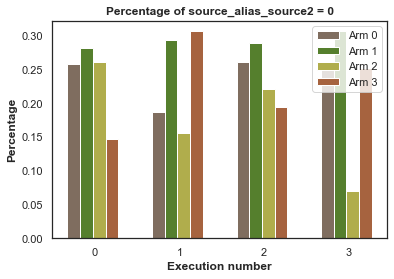

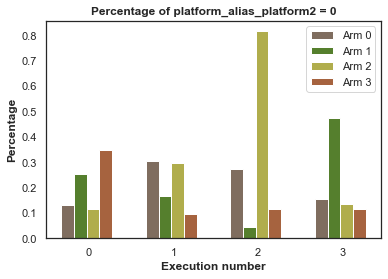

In [150]:
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "platform_alias_platform2")

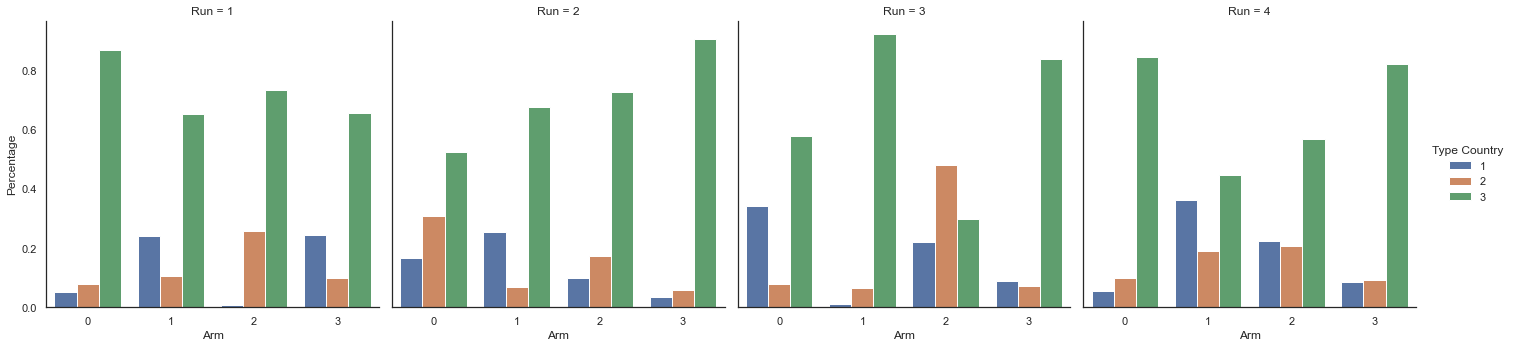

In [206]:
PlotFeaturesArm_4_Country5Runs(Feat_Best7_4)

#### Test removing features

In [149]:
Reward = "ad_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 4

Results7_4_aux2, Paths_Best7_4_aux2, Aligns_Best7_4_aux2, Mean_Reward_Best7_4_aux2, Mean_RewardArms_Best7_4_aux2, Mark_Best7_4_aux2, Feat_Best7_4_aux2, Times_ArmChosen7_4_aux2 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.5414905227138754
Parameters for following model:
	Reward: ad_revenue_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:19<00:00, 627.14it/s]


	Algorithm result is: 0.5480234370714651
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:19<00:00, 627.95it/s]


	Algorithm result is: 0.5402145884740299
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:17<00:00, 646.14it/s]


	Algorithm result is: 0.5297834064802234
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:19<00:00, 627.25it/s]


	Algorithm result is: 0.5411354067226187
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:20<00:00, 622.70it/s]


	Algorithm result is: 0.5505573027901141
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:20<00:00, 618.05it/s]


	Algorithm result is: 0.5526829542493066
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:15<00:00, 664.28it/s]


	Algorithm result is: 0.5447716663085154
	Score to beat is: 0.5414905227138754
EVALUATION WITH DIFFERENT ALPHAS FOR ad_revenue_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:15<00:00, 663.45it/s]

	Algorithm result is: 0.5323002449211368
	Score to beat is: 0.5414905227138754


In [130]:
Results7_4_aux2

[0.5529915163230024,
 0.5338020359154771,
 0.5342158590371742,
 0.5412527716416845,
 0.5577572734629144,
 0.5374483070804323,
 0.5510381477830335,
 0.5575688300219208]

In [131]:
print("Best alpha is:", Alphas[Results7_4_aux2.index(np.max(Results7_4_aux2))])
Alpha = Alphas[Results7_4_aux2.index(np.max(Results7_4_aux2))]

Best alpha is: 2.3581015157406195


In [132]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.5254883941191079
0.5384326550589074


In [135]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4_aux2))

Score to beat: 0.5414905227138754
Algorithm score: 0.5577572734629144


In [136]:
Mean_Reward_Best7_4_aux2

[0.5713794990691988,
 0.5576763836771599,
 0.5599084755663342,
 0.575615507501287,
 0.5242065015005916]

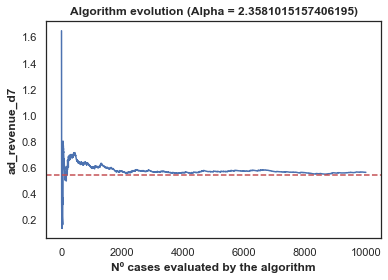

In [142]:
Plot_AlignRewards(Aligns_Best7_4_aux2, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

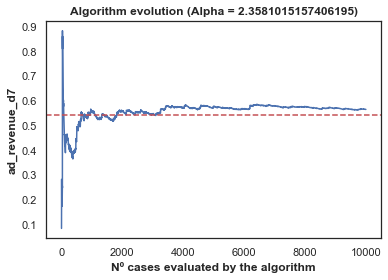

In [147]:
Plot_AlignRewards(Aligns_Best7_4_aux2, 2, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

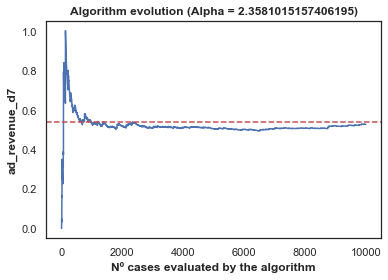

In [139]:
Plot_AlignRewards(Aligns_Best7_4_aux2, 4, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

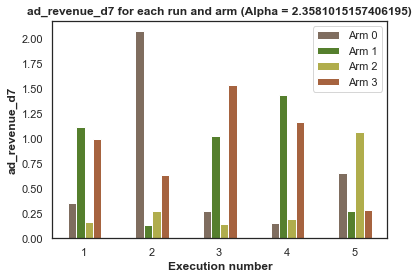

In [143]:
PerformanceArm4(Mean_RewardArms_Best7_4_aux2, Alpha, Reward)

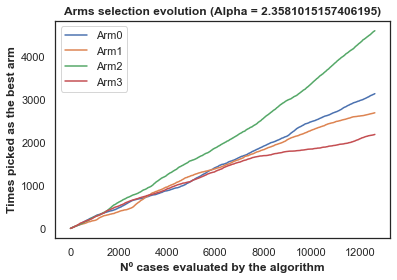

In [144]:
Plot_ArmsSelection(Paths_Best7_4_aux2, 0, Alpha)

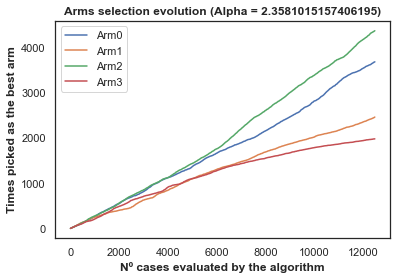

In [146]:
Plot_ArmsSelection(Paths_Best7_4_aux2, 2, Alpha)

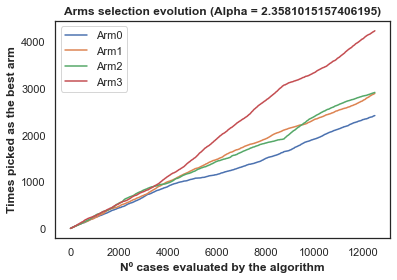

In [145]:
Plot_ArmsSelection(Paths_Best7_4_aux2, 4, Alpha)

In [10]:
print("Source distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
print("Platform distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
print("Country distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")

Source distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Platform distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Country distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64



Times each arm is chosen: [4313. 5767.]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 32.3051948051948
Proportion source_alias_source2 equals 0 for arm 1 is: 13.614290669441553


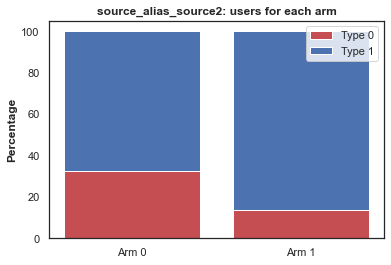

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 61.827458256029686
Proportion platform_alias_platform2 equals 0 for arm 1 is: 84.25251474158863


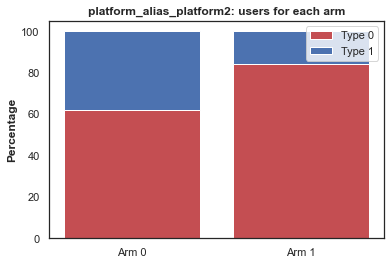

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.57884972 0.26089981 0.16025046]
Proportion country for arm 1 is: [0.06347555 0.07336108 0.86316337]


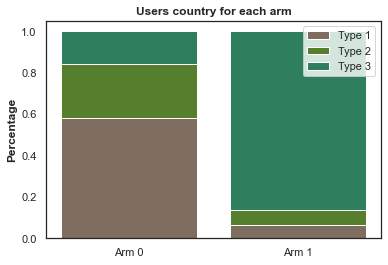

In [189]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4_aux2, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4_aux2, Feat_Best7_4_aux2)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4_aux2, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4_aux2, Feat_Best7_4_aux2)

In [148]:
printFeatures2(Mark_Best7_4_aux2, Feat_Best7_4_aux2, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 89.66757738393409
Proportion country_alias_country_group1 equals 0 for arm 1 is: 82.51952013376267
Proportion country_alias_country_group1 equals 0 for arm 2 is: 88.21222602622025
Proportion country_alias_country_group1 equals 0 for arm 3 is: 87.47784208912768

Proportion country_alias_country_group2 equals 0 for arm 0 is: 84.31243844995768
Proportion country_alias_country_group2 equals 0 for arm 1 is: 86.40520137049774
Proportion country_alias_country_group2 equals 0 for arm 2 is: 92.33214906928336
Proportion country_alias_country_group2 equals 0 for arm 3 is: 83.95994206429667

Proportion country_alias_country_group3 equals 0 for arm 0 is: 26.019984166108216
Proportion country_alias_country_group3 equals 0 for arm 1 is: 31.075278495739607
Proportion country_alias_country_group3 equals 0 for arm 2 is: 19.4556249044964
Proportion country_alias_country_group3 equals 0 for arm 3 is: 28.562215846575672

Proportion platform_ali

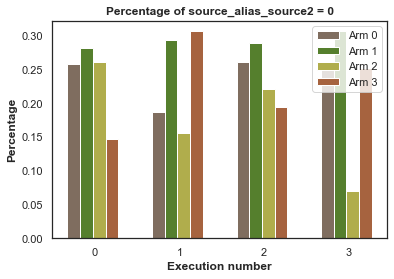

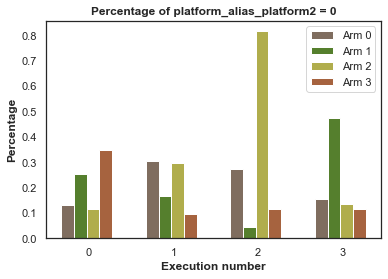

In [150]:
PlotFeaturesArm_4(Feat_Best7_4_aux2, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4_aux2, Alpha, Reward = "platform_alias_platform2")

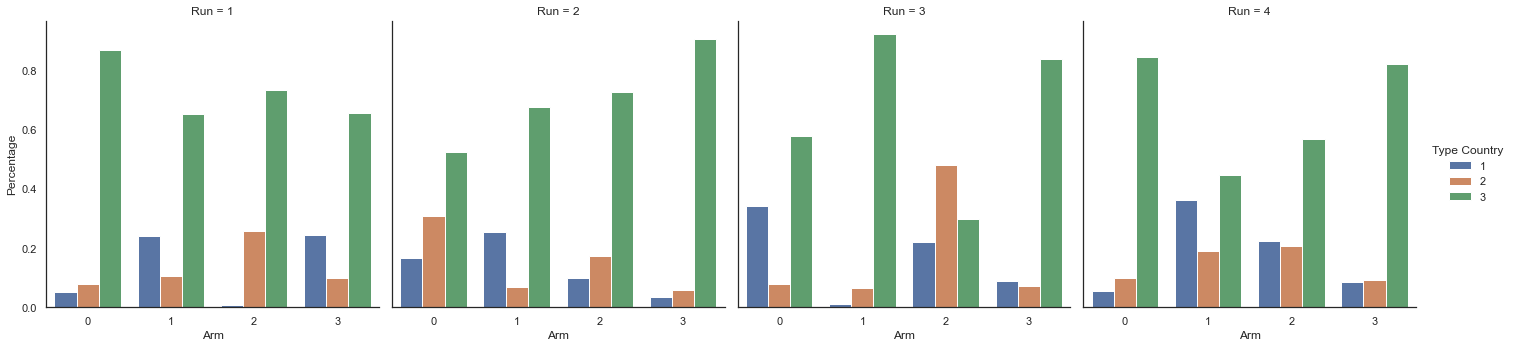

In [206]:
PlotFeaturesArm_4_Country5Runs(Feat_Best7_4_aux2)